[(0, 1), (2, 3), (1, 2), (3, 4), (0, 1), (2, 3), (1, 2), (3, 4), (0, 1), (2, 3), (1, 2), (3, 5), (0, 1), (2, 3), (1, 2), (3, 5), (0, 1), (2, 3), (1, 2), (3, 6), (0, 1), (2, 3), (1, 2), (3, 6), (0, 1), (2, 3), (1, 2), (3, 7), (0, 1), (2, 3), (1, 2), (3, 7), (0, 1), (2, 3), (1, 2), (3, 8), (0, 1), (2, 3), (1, 2), (3, 8), (0, 1), (2, 3), (1, 2), (3, 9), (0, 1), (2, 3), (1, 2), (3, 9), (0, 1), (2, 3), (1, 2), (3, 10), (0, 1), (2, 3), (1, 2), (3, 10), (0, 1), (2, 3), (1, 2), (3, 11), (0, 1), (2, 3), (1, 2), (3, 11), (0, 1), (2, 3), (1, 2), (3, 12), (0, 1), (2, 3), (1, 2), (3, 12), (0, 1), (2, 3), (1, 2), (3, 13), (0, 1), (2, 3), (1, 2), (3, 13), (0, 1), (2, 3), (1, 2), (3, 14), (0, 1), (2, 3), (1, 2), (3, 14), (0, 1), (2, 3), (1, 2), (3, 15), (0, 1), (2, 3), (1, 2), (3, 15)]


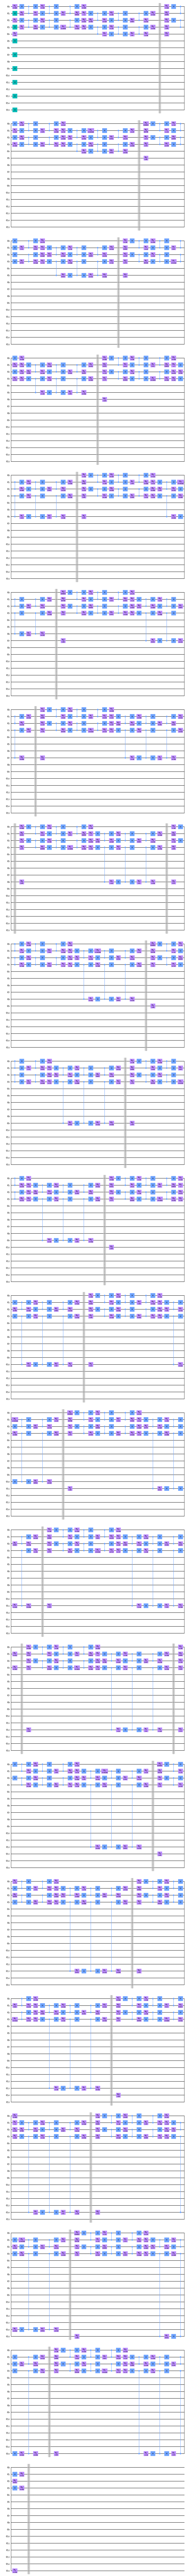

In [3]:
from quimb import *
from quimb.tensor import *
import quimb as qu
import numpy as np
import matplotlib.pyplot as plt
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
import quf

Gate="SU4"
Gate="FSIMG"

list_params=load_from_disk(f"list_params{Gate}")
#print (list_params)

list_qubits=load_from_disk(f"list_qubits{Gate}")
print (list_qubits)

list_tag_block=load_from_disk("list_tag_block")
#print (list_tag_block[0], len(list_tag_block[0]))
#physical + bond qubits
L=12+4
U=6.0
t=1.0
mu=0

#Register qubit


circ = QuantumCircuit(L)
circ_temp = QuantumCircuit(L)
count_val=0
if Gate=="FSIMG":
 mu=0
 for i in range(L):
  if i%2!=0:  
   circ.x(i)
   circ_temp.x(i)

for i in range(len(list_params)):
     param_1=list_params[i]
     where=list_qubits[i]
     if Gate=="FSIMG":
         circ=quf.make_circuit( circ, param_1, where )
         circ_temp=quf.make_circuit(circ_temp, param_1, where )
     else:
         circ=quf.make_circuit_gen(circ, param_1, where )
         circ_temp=quf.make_circuit_gen(circ_temp, param_1, where )
     if (i+1)%(len(list_tag_block[0]))==0:
      #print ("i", i)
      circ.barrier(range(L))
      circ_temp.barrier(range(L))
      circ_temp.draw(output='mpl', filename=f'Figs/circuit{count_val}.pdf')
      count_val+=1
      circ_temp = QuantumCircuit(L)


      if Gate=="FSIMG":
       mu=0
       for i in range(L):
        if i%2!=0:  
         circ_temp.x(i)






circ.draw(output='mpl', filename='my_circuit.pdf')
#plt.savefig('circ.pdf')
#plt.clf()
# backend = Aer.get_backend('statevector_simulator')
# job = execute(circ, backend)
# result_sim = job.result()
# psi  = result_sim.get_statevector(circ, decimals=5)
# 
# 
# #print ("psi", psi)
# MPO_origin=quf.mpo_Fermi_Hubburd(L//2, U, t, mu)
# MPO_N=quf.mpo_particle(L//2)
# MPO_up, MPO_down=quf.mpo_spin(L//2)
# #print ("E_exact", -6.3474)
# #print (  "E=", psi.conj().T @ MPO_origin.to_dense() @ psi)
# #print (  "N=", psi.conj().T @ MPO_N.to_dense() @ psi)
# #print (  "Up=", psi.conj().T @ MPO_up.to_dense() @ psi)
# #print (  "Down=", psi.conj().T @ MPO_down.to_dense() @ psi)
# 
# MPO_I=MPO_identity(L, phys_dim=2)
# MPO_result=MPO_identity(L, phys_dim=2)
# MPO_result=MPO_result*0.0
# MPO_f=MPO_result*0.0
# max_bond_val=200
# cutoff_val=1.0e-12
# 
# 
# for i in range( L):
# 
#  MPO_I=MPO_identity(L, phys_dim=2)
#  W = np.zeros([ 1, 1, 2, 2])
#  Z = qu.pauli('Z')
#  X = qu.pauli('X')
#  Y = qu.pauli('Y')
#  I = qu.pauli('I')
#  S_up=(X+1.0j*Y)*(0.5)
#  S_down=(X-1.0j*Y)*(0.5)
#  Wl = np.zeros([ 1, 2, 2], dtype='float64')
#  W = np.zeros([1, 1, 2, 2], dtype='float64')
#  Wr = np.zeros([ 1, 2, 2], dtype='float64')
#  
#  Wl[ 0,:,:]=S_up@S_down
#  W[ 0,0,:,:]=S_up@S_down
#  Wr[ 0,:,:]=S_up@S_down
# 
# 
#  W_list=[Wl]+[W]*(L-2)+[Wr]
# 
#  MPO_I[i].modify(data=W_list[i])
#  E_final=psi.conj().T @ MPO_I.to_dense() @ psi  
#  print ("i", i, "X", E_final.real )
# 
# E_u=0
# for i in range(2):
#   MPO_I=MPO_identity(L, phys_dim=2)
#   MPO_I[2*i].modify(data=W_list[2*i])
#   MPO_I[2*i+1].modify(data=W_list[2*i+1])
#   MPO_I=MPO_I*U
#   E_final2=psi.conj().T @ MPO_I.to_dense() @ psi  
#   print ("i", i, "U", E_final2.real )
#   E_u+=E_final2.real
# 
# 
# E_t=0
# for i in range(2):
#   Wl = np.zeros([ 1, 2, 2], dtype='float64')
#   W = np.zeros([1, 1, 2, 2], dtype='float64')
#   Wr = np.zeros([ 1, 2, 2], dtype='float64')
# 
#   Wl[ 0,:,:]=S_up
#   W[ 0,0,:,:]=S_up
#   Wr[ 0,:,:]=S_up
#   W_1=[Wl]+[W]*(L-2)+[Wr]
# 
#   Wl = np.zeros([ 1, 2, 2], dtype='float64')
#   W = np.zeros([1, 1, 2, 2], dtype='float64')
#   Wr = np.zeros([ 1, 2, 2], dtype='float64')
# 
#   Wl[ 0,:,:]=S_down
#   W[ 0,0,:,:]=S_down
#   Wr[ 0,:,:]=S_down
#   W_2=[Wl]+[W]*(L-2)+[Wr]
# 
#   MPO_I=MPO_identity(L, phys_dim=2 )
#   MPO_I[2*i].modify(data=W_1[2*i])
#   MPO_I[2*i+2].modify(data=W_2[2*i+2])
#   MPO_result=MPO_I*1.0
#   MPO_result.compress( max_bond=max_bond_val, cutoff=cutoff_val )
# 
#   MPO_I=MPO_identity(L, phys_dim=2 )
#   MPO_I[2*i].modify(data=W_2[2*i])
#   MPO_I[2*i+2].modify(data=W_1[2*i+2])
#   MPO_result=MPO_result+MPO_I
#   MPO_result.compress( max_bond=max_bond_val, cutoff=cutoff_val )
# 
# 
#   MPO_I=MPO_identity(L, phys_dim=2 )
#   MPO_I[2*i+1].modify(data=W_1[2*i+1])
#   MPO_I[2*i+3].modify(data=W_2[2*i+3])
#   MPO_result=MPO_result+MPO_I
#   MPO_result.compress( max_bond=max_bond_val, cutoff=cutoff_val )
# 
#   MPO_I=MPO_identity(L, phys_dim=2 )
#   MPO_I[2*i+1].modify(data=W_2[2*i+1])
#   MPO_I[2*i+3].modify(data=W_1[2*i+3])
#   MPO_result=MPO_result+MPO_I
#   MPO_result.compress( max_bond=max_bond_val, cutoff=cutoff_val )
#   MPO_f=MPO_result*(t)
#   MPO_f.compress( max_bond=max_bond_val, cutoff=cutoff_val )
# 
#   E_final1=psi.conj().T @ MPO_f.to_dense() @ psi  
#   print ("i", i, "t", E_final1.real )
#   E_t+=E_final1.real
# 
# 
# print ("final", E_t,E_u, (E_u+E_t)/2.  )





# plot_state_city(psi)
# plt.savefig('psi-city.pdf')
# plt.clf()
# 
# plot_state_hinton(psi)
# plt.savefig('psi-hinton.pdf')
# plt.clf()
# 
# 
# plot_state_paulivec(psi, title="My Paulivec", color=['purple', 'orange', 'green'])
# plt.savefig('psi-paulivec.pdf')
# plt.clf()



# backend = Aer.get_backend('unitary_simulator')
# job = execute(circ, backend)
# result_sim = job.result()
# U  = result_sim.get_unitary(circ, decimals=5)
# print ("U", U, type(U), np.shape(U))







#meas = QuantumCircuit(L, L)
#meas.barrier(range(L))
#meas.measure(range(L), range(L))
#qc = circ + meas
#qc.draw(output='mpl', filename='finalCirc.pdf')

#backend = Aer.get_backend('statevector_simulator')
#job = execute(qc, backend, shots=1000)
#result_sim = job.result()





#counts = result_sim.get_counts(qc)
#print(counts)

# holopy qiskit

In [5]:
from quimb import *
from quimb.tensor import *
import quimb as qu
import numpy as np
import matplotlib.pyplot as plt
import qiskit as qk
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere
import qiskit.providers.aer.noise as noise
import quf
from qiskit import Aer, execute

Gate="FSIMG"
list_params=load_from_disk(f"list_params{Gate}")
nphys = 2
nbond = 4
total_site = 6
qubit_pair = 16

preg = qk.QuantumRegister(nphys, 'p')
breg = qk.QuantumRegister(nbond, 'b')
qregs = [preg, breg]
list_qubits_o=load_from_disk(f"list_qubits{Gate}")
list_tag_block=load_from_disk("list_tag_block")

list_qubit_block1 = [(breg[0], breg[1]), (breg[2], breg[3]),\
                    (breg[1], breg[2]), (breg[3], preg[0]),\
                    (breg[0], breg[1]), (breg[2], breg[3]),\
                    (breg[1], breg[2]), (breg[3], preg[0])]
list_qubit_block2 = [(breg[0], breg[1]), (breg[2], breg[3]),\
                    (breg[1], breg[2]), (breg[3], preg[1]),\
                    (breg[0], breg[1]), (breg[2], breg[3]),\
                    (breg[1], breg[2]), (breg[3], preg[1])]
list_qubits = total_site * (list_qubit_block1 + list_qubit_block2)

In [6]:
## count the number of parameters in the first two physical qubits:
params_N = 0
tuple0 = ()
for k in range(qubit_pair):
    params_N += len(list_params[k])
    tuple0 += list_params[k]
params = list(tuple0)

In [7]:
plabels = [qk.circuit.Parameter('x' + str(j)) for j in range(params_N)]

list_plabels = []
for k in range(qubit_pair):
    list_plabels.append((plabels[5*k], plabels[5*k+1], plabels[5*k+2],\
                        plabels[5*k+3], plabels[5*k+4]))
    
paramdict = dict(zip(plabels, params))

In [8]:
circ = qk.QuantumCircuit()
for reg in qregs:
    circ.add_register(reg)
circ.x(preg[1])
for i in range(qubit_pair):
    param_1 = list_plabels[i]
    where=list_qubits[i]
    circ=quf.make_circuit(circ, param_1, where)

In [9]:
import sys
sys.path.append("..") # import one subdirectory up in files
from networks.isonetwork import IsoTensor, IsoNetwork, QKParamCircuit
import mps.mps
import networks.networks as nt

In [10]:
bond_prep_params = []
bond_prep_circ = qk.QuantumCircuit(breg)
bond_prep_circ.x(breg[1])
bond_prep_pcirc = QKParamCircuit(bond_prep_circ, bond_prep_params)

In [11]:
pcircs = [QKParamCircuit(circ, plabels)]
base1 = 2 * total_site * 'z'
psi_mps = nt.IsoMPS(preg, breg, pcircs, \
                    boundary_circuit = bond_prep_pcirc, L = 5, FH = True)
circ1 = psi_mps.construct_circuit(paramdict)

In [13]:
### measure the tight binding part:
### measure the U part

base1 = 'zzzzzzzzxzxz'
base2 = 'zzzzzzzzyzyz'
base3 = 'zzzzzzzzzxzx'
base4 = 'zzzzzzzzzyzy'
base5 = 'zzzzzzzzzzzz'

bl = [base1, base2, base3, base4, base5]
cl = []
shots = 1000
simulator = qk.providers.aer.QasmSimulator(method = 'matrix_product_state')

for k in range(len(bl)):
    psi_mps = nt.IsoMPS(preg, breg, pcircs,\
                        boundary_circuit = bond_prep_pcirc,\
                        L=total_site, bases = bl[k], FH = True)
    circx = psi_mps.construct_circuit(paramdict)
    result = execute(circx, simulator, shots=shots).result()
    count1 = result.get_counts(circx)
    cl.append(count1)
#circx.draw('mpl')

In [14]:
def fermi_counts_to_green(s1, s2, counts, shots):
    c1 = 0
    for k, v in counts.items():
        res = v * (1.0-2.0*np.float(k[s1]=='1')) * \
        (1.0-2.0*np.float(k[s2]=='1'))
        #for s in range(s1+1, s2):
        #    res *= (-1.0 + 2.0 * np.float(k[s]=='1'))
        c1 += res
    C = c1/shots
    return C

In [15]:
def fermi_counts_to_NN(s1, s2, counts, shots):
    c1 = 0
    for k,v in counts.items():
        res = v * np.float(k.replace(" ","")[s1]=='1') *\
        np.float(k.replace(" ","")[s2]=='1')
        #Ntot = np.float(k.replace(" ","")[s1]=='1') +\
        #np.float(k.replace(" ","")[s2]=='1')
        #res = v * (Ntot-1)*Ntot / 2
        c1 += res
    C = c1/shots
    return C

## noise model

In [51]:
## Define Noise Model ##
# errors (simulation)
perr_1q = 0.001 # 1-qubit gate error
perr_2q = 0.005 # 2-qubit gate error

# depolarizaing errors
depol_1q = noise.depolarizing_error(perr_1q, 1)
depol_2q = noise.depolarizing_error(perr_2q, 2)
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(depol_1q, ['u1', 'u2', 'u3','rx','ry','rz'])
noise_model.add_all_qubit_quantum_error(depol_2q, ['cx','cz','rxx'])

In [44]:
### measure the tight binding part:
### measure the U part

base1 = 'zzzzzzzzxzxz'
base2 = 'zzzzzzzzyzyz'
base3 = 'zzzzzzzzzxzx'
base4 = 'zzzzzzzzzyzy'
base5 = 'zzzzzzxzxzzz'
base6 = 'zzzzzzyzyzzz'
base7 = 'zzzzzzzxzxzz'
base8 = 'zzzzzzzyzyzz'
base9 = 'zzzzzzzzzzzz'

bl = [base1, base2, base3, base4,\
     base5, base6, base7, base8, base9]
#bl = [base2]
cl = []
shots = 1000
simulator = qk.providers.aer.QasmSimulator(method = 'matrix_product_state')

for k in range(len(bl)):
    psi_mps = nt.IsoMPS(preg, breg, pcircs,\
                        boundary_circuit = bond_prep_pcirc,\
                        L=total_site, bases = bl[k], FH = True)
    circx = psi_mps.construct_circuit(paramdict)
    result = execute(circx, simulator, shots=shots).result()
    #result = execute(circx, simulator, shots=shots,\
    #                noise_model = noise_model).result()
    count1 = result.get_counts(circx)
    cl.append(count1)

In [45]:
CduCu01=-0.25*(-1)*(fermi_counts_to_green(1,3,cl[0],shots)+\
                   fermi_counts_to_green(1,3,cl[1],shots))
CddCd01=-0.25*(-1)*(fermi_counts_to_green(0,2,cl[2],shots)+\
                    fermi_counts_to_green(0,2,cl[3],shots))
CduCu12=-0.25*(-1)*(fermi_counts_to_green(3,5,cl[4],shots)+\
                    fermi_counts_to_green(3,5,cl[5],shots))
CddCd12=-0.25*(-1)*(fermi_counts_to_green(2,4,cl[6],shots)+\
                    fermi_counts_to_green(2,4,cl[7],shots))
E_t = 2*(CduCu01 + CddCd01 + CduCu12 + CddCd12)
print(E_t)

-1.459


In [46]:
print(U)
NuNd0 = U * fermi_counts_to_NN(0,1,cl[8],shots)
print(NuNd0)
NuNd1 = U * fermi_counts_to_NN(2,3,cl[8],shots)
print(NuNd1)
E_u = NuNd0 + NuNd1
print(E_u)

6.0
0.306
0.36
0.6659999999999999


In [47]:
print((E_t+E_u) / 2)

-0.3965000000000001


## with noise

In [52]:
### measure the tight binding part:
### measure the U part

base1 = 'zzzzzzzzxzxz'
base2 = 'zzzzzzzzyzyz'
base3 = 'zzzzzzzzzxzx'
base4 = 'zzzzzzzzzyzy'
base5 = 'zzzzzzxzxzzz'
base6 = 'zzzzzzyzyzzz'
base7 = 'zzzzzzzxzxzz'
base8 = 'zzzzzzzyzyzz'
base9 = 'zzzzzzzzzzzz'

bl = [base1, base2, base3, base4,\
     base5, base6, base7, base8, base9]
cl = []
shots = 1000
simulator = qk.providers.aer.QasmSimulator(method = 'matrix_product_state')

for k in range(len(bl)):
    psi_mps = nt.IsoMPS(preg, breg, pcircs,\
                        boundary_circuit = bond_prep_pcirc,\
                        L=total_site, bases = bl[k], FH = True)
    circx = psi_mps.construct_circuit(paramdict)
    result = execute(circx, simulator, shots=shots,\
                    noise_model = noise_model).result()
    count1 = result.get_counts(circx)
    cl.append(count1)
    
CduCu01=-0.25*(-1)*(fermi_counts_to_green(1,3,cl[0],shots)+\
                   fermi_counts_to_green(1,3,cl[1],shots))
CddCd01=-0.25*(-1)*(fermi_counts_to_green(0,2,cl[2],shots)+\
                    fermi_counts_to_green(0,2,cl[3],shots))
CduCu12=-0.25*(-1)*(fermi_counts_to_green(3,5,cl[4],shots)+\
                    fermi_counts_to_green(3,5,cl[5],shots))
CddCd12=-0.25*(-1)*(fermi_counts_to_green(2,4,cl[6],shots)+\
                    fermi_counts_to_green(2,4,cl[7],shots))
E_t = 2*(CduCu01 + CddCd01 + CduCu12 + CddCd12)
print(E_t)

NuNd0 = U * fermi_counts_to_NN(0,1,cl[8],shots)
print(NuNd0)
NuNd1 = U * fermi_counts_to_NN(2,3,cl[8],shots)
print(NuNd1)
E_u = NuNd0 + NuNd1
print(E_u)

print((E_t+E_u) / 2)

-0.8480000000000001
0.618
0.516
1.134
0.1429999999999999


In [170]:
def Err_L(l1):
    e1 = np.sqrt(st.variance(l1)/ (len(l1) - 1))
    return e1

def NN_d_err(ln1, ln2, lnn):
    err1 = np.sqrt(Err_L(lnn) ** 2 + \
                   (sum(ln2)/len(ln2) * Err_L(ln1))**2 + \
                   (sum(ln1)/len(ln1) * Err_L(ln2))**2)
    
    return err1

## charge and spin correlation

In [59]:
### (disconnected) charge correlation post possessing:
def counts_to_ChargeCorr(s1, s2, counts, shots):
    N1 = 0
    N2 = 0
    N1N2 = 0
    for k,v in counts.items():
        
        res_N1N2 = v * (np.float(k[2*s1]=='1')+np.float(k[2*s1+1]=='1')) * \
        (np.float(k[2*s2]=='1') + np.float(k[2*s2+1]=='1'))
        res_N1 = v * (np.float(k[2*s1]=='1') + np.float(k[2*s1+1]=='1'))
        res_N2 = v * (np.float(k[2*s2]=='1') + np.float(k[2*s2+1]=='1'))
        N1N2 += res_N1N2
        N1 += res_N1
        N2 += res_N2
    N1N2 = N1N2 / shots
    N1 = N1 / shots
    N2 = N2 / shots
    NNderr = NN_d_err(N1_l, N2_l, N1N2_l)
    #return (N1N2 - N1*N2, N1N2, N1, N2)
    return (N1N2 - N1*N2, NNderr)
    return (N1N2-N1*N2, N1N2, N1, N2)

In [71]:
### (disconnected) spin correlatin post possessing:
def counts_to_SpinCorr(s1, s2, counts, shots):
    N1 = 0
    N2 = 0
    N1N2 = 0
    N1_l = []
    N2_l = []
    N1N2_l = []
    for k,v in counts.items():
        
        res_N1N2 = (-np.float(k[2*s1]=='1')+np.float(k[2*s1+1]=='1'))*\
        (-np.float(k[2*s2]=='1') + np.float(k[2*s2+1]=='1'))
        res_N1 = (-np.float(k[2*s1]=='1') + np.float(k[2*s1+1]=='1'))
        res_N2 = (-np.float(k[2*s2]=='1') + np.float(k[2*s2+1]=='1'))
        N1N2 += v* res_N1N2
        N1 += v* res_N1
        N2 += v* res_N2
        N1_l+=(v * [res_N1])
        N2_l+=(v * [res_N2])
        N1N2_l+=(v * [res_N1N2])
    N1N2 = N1N2 / shots
    N1 = N1 / shots
    N2 = N2 / shots
    #NNderr = NN_d_err(N1_l, N2_l, N1N2_l)
    return (N1N2 - N1*N2, N1N2, N1, N2)
    #return (N1N2 - N1*N2, NNderr)
    #return (N1_l, N2_l, N1N2_l)

In [165]:
### (disconnected) charge correlation post possessing:
def counts_to_ChargeCorr(s1, s2, counts, shots):
    N1 = 0
    N2 = 0
    N1N2 = 0
    N1_l = []
    N2_l = []
    N1N2_l = []
    for k,v in counts.items():        
        
        res_N1N2 = (np.float(k[2*s1]=='1')+np.float(k[2*s1+1]=='1')) * \
        (np.float(k[2*s2]=='1') + np.float(k[2*s2+1]=='1'))
        res_N1 = (np.float(k[2*s1]=='1') + np.float(k[2*s1+1]=='1'))
        res_N2 = (np.float(k[2*s2]=='1') + np.float(k[2*s2+1]=='1'))
        '''
        res_N1N2 = v * (np.float(k[2*s1]=='0')+np.float(k[2*s1+1]=='0')) * \
        (np.float(k[2*s2]=='0') + np.float(k[2*s2+1]=='0'))
        res_N1 = v * (np.float(k[2*s1]=='0') + np.float(k[2*s1+1]=='0'))
        res_N2 = v * (np.float(k[2*s2]=='0') + np.float(k[2*s2+1]=='0'))
        '''
        N1N2 += v*res_N1N2
        N1 += v*res_N1
        N2 += v*res_N2
        
        N1_l+=(v * [res_N1])
        N2_l+=(v * [res_N2])
        N1N2_l+=(v * [res_N1N2])
    N1N2 = N1N2 / shots
    N1 = N1 / shots
    N2 = N2 / shots
    NNderr = NN_d_err(N1_l, N2_l, N1N2_l)
    # return (N1N2-N1*N2, N1N2, N1, N2)
    return (N1N2 - N1*N2, NNderr)

In [166]:
### (disconnected) spin correlatin post possessing:
def counts_to_SpinCorr(s1, s2, counts, shots):
    N1 = 0
    N2 = 0
    N1N2 = 0
    N1_l = []
    N2_l = []
    N1N2_l = []
    for k,v in counts.items():
        
        res_N1N2 = (-np.float(k[2*s1]=='1')+np.float(k[2*s1+1]=='1'))*\
        (-np.float(k[2*s2]=='1') + np.float(k[2*s2+1]=='1'))
        res_N1 = (-np.float(k[2*s1]=='1') + np.float(k[2*s1+1]=='1'))
        res_N2 = (-np.float(k[2*s2]=='1') + np.float(k[2*s2+1]=='1'))

        N1N2 += v* res_N1N2
        N1 += v* res_N1
        N2 += v* res_N2
        N1_l+=(v * [res_N1])
        N2_l+=(v * [res_N2])
        N1N2_l+=(v * [res_N1N2])
    N1N2 = N1N2 / shots
    N1 = N1 / shots
    N2 = N2 / shots
    NNderr = NN_d_err(N1_l, N2_l, N1N2_l)
    #return (N1N2 - N1*N2, N1N2, N1, N2)
    return (N1N2 - N1*N2, NNderr)
    #return (N1_l, N2_l, N1N2_l)

In [82]:
max_r = 3
burn_in = 6
L1 = burn_in + max_r
basez = 2*L1*'z'
bl = [basez]
cl = []
shots = 10000
simulator = qk.providers.aer.QasmSimulator(method = 'matrix_product_state')

for k in range(len(bl)):
    psi_mps = nt.IsoMPS(preg, breg, pcircs,\
                        boundary_circuit = bond_prep_pcirc,\
                        L=L1, bases = bl[k], FH = True)
    circx = psi_mps.construct_circuit(paramdict)
    result = execute(circx, simulator, shots=shots).result()
    result_noise = execute(circx, simulator, shots=shots, \
                    noise_model = noise_model).result()
    count1 = result.get_counts(circx)
    count1n = result_noise.get_counts(circx)
    cl.append(count1)
    
countz = cl[0]

In [83]:
print(counts_to_ChargeCorr(3, 2, countz, shots))
print(counts_to_ChargeCorr(3, 1, countz, shots))
print(counts_to_ChargeCorr(3, 0, countz, shots))

(-0.055195399999999895, 0.9451, 1.0023, 0.998)
(-0.0033958600000000283, 0.9971, 1.0023, 0.9982)
(0.0008926400000000001, 1.0064, 1.0023, 1.0032)


In [84]:
print(counts_to_ChargeCorr(3, 2, count1n, shots))
print(counts_to_ChargeCorr(3, 1, count1n, shots))
print(counts_to_ChargeCorr(3, 0, count1n, shots))

(-0.03132849999999998, 0.8469, 0.9418, 0.9325)
(-0.003451259999999956, 0.8825, 0.9418, 0.9407)
(-0.0007528399999998658, 0.8787, 0.9418, 0.9338)


In [85]:
print(counts_to_SpinCorr(3, 2, countz, shots))
print(counts_to_SpinCorr(3, 1, countz, shots))
print(counts_to_SpinCorr(3, 0, countz, shots))

(-0.44462103999999997, -0.4447, -0.0047, 0.0168)
(0.1279966, 0.1281, -0.0047, -0.022)
(-0.0485154, -0.0486, -0.0047, 0.018)


In [86]:
print(counts_to_SpinCorr(3, 2, count1n, shots))
print(counts_to_SpinCorr(3, 1, count1n, shots))
print(counts_to_SpinCorr(3, 0, count1n, shots))

(-0.2161175, -0.2153, 0.0218, 0.0375)
(0.05055662, 0.0513, 0.0218, 0.0341)
(-0.013053720000000001, -0.0125, 0.0218, 0.0254)


In [167]:
# return two list of correlations: spin corr & charge corr
def corr_w_burn_in(burn_in, max_r, shots, noise_model, with_noise):
    L1 = burn_in + max_r
    basez = 2*L1*'z'
    bl = [basez]
    cl = []
    simulator = qk.providers.aer.QasmSimulator(method = 'matrix_product_state')

    for k in range(len(bl)):
        psi_mps = nt.IsoMPS(preg, breg, pcircs,\
                            boundary_circuit = bond_prep_pcirc,\
                            L=L1, bases = bl[k], FH = True)
        circx = psi_mps.construct_circuit(paramdict)
        result = execute(circx, simulator, shots=shots).result()
        result_noise = execute(circx, simulator, shots=shots, \
                        noise_model = noise_model).result()
        count1 = result.get_counts(circx)
        count1n = result_noise.get_counts(circx)
        cl.append(count1)
        cl.append(count1n)
    
    countz = cl[0]
    countzn = cl[1]
    
    spin_corr = []
    charge_corr = []
    spin_err = []
    charge_err = []
    
    if with_noise == True:
        count_f = countzn
    else:
        count_f = countz
    
    for i in range(max_r-1, -1, -1):
        spin_info = counts_to_SpinCorr(max_r,i,count_f,shots)
        charge_info = counts_to_ChargeCorr(max_r,i,count_f,shots)
        spin_corr.append(abs(spin_info[0]))
        charge_corr.append(abs(charge_info[0]))
        spin_err.append(abs(spin_info[1]))
        charge_err.append(abs(charge_info[1]))
    return {'spin_corr':spin_corr,'charge_corr':charge_corr,\
           'spin_err':spin_err,'charge_err':charge_err}

In [173]:
import pickle
import statistics as st

In [174]:
corr63_1000 = corr_w_burn_in(6, 3, 1000, noise_model, True)
pickle.dump(corr63_1000, open("burnin6_1000shots_wNoise1", "wb"))

In [175]:
corr43_1000 = corr_w_burn_in(4, 3, 1000, noise_model, True)
pickle.dump(corr43_1000, open("burnin4_1000shots_wNoise1", "wb"))

In [176]:
corr23_1000 = corr_w_burn_in(2, 3, 1000, noise_model, True)
pickle.dump(corr23_1000, open("burnin2_1000shots_wNoise1", "wb"))

In [177]:
corr63_10000 = corr_w_burn_in(6, 3, 10000, noise_model, False)
pickle.dump(corr63_10000, open("burnin6_10000shots_woNoise1", "wb"))

In [178]:
file1 = open("burnin6_1000shots_wNoise1", 'rb')
corr63_1000 = pickle.load(file1)
file1.close()
file2 = open("burnin4_1000shots_wNoise1", 'rb')
corr43_1000 = pickle.load(file2)
file2.close()
file3 = open("burnin2_1000shots_wNoise1", 'rb')
corr23_1000 = pickle.load(file3)
file3.close()
file4 = open("burnin6_10000shots_woNoise1", 'rb')
corr63_10000 = pickle.load(file4)
file4.close()

In [163]:
corr_spin_th=\
[abs(-0.4409482614771426), abs(0.1306447411889523), abs(-0.0224301532633344)]
corr_charge_th = \
[abs(-0.05124371766954927), abs(-0.004116794032683391), abs(-0.0010316058066366374)] 

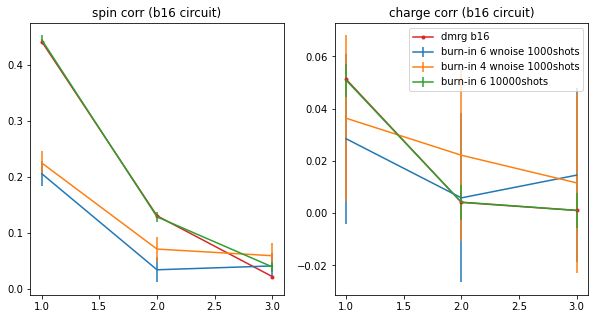

In [179]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(10,5)
r=[1,2,3]
ax1.errorbar(x=r, y=corr63_1000['spin_corr'], yerr=corr63_1000['spin_err'],label = 'burn-in 6 wnoise 1000shots')
ax1.errorbar(x=r, y=corr43_1000['spin_corr'], yerr=corr43_1000['spin_err'],label = 'burn-in 4 wnoise 1000shots')
# plt.plot(r, corr23_1000['spin_corr'])
ax1.errorbar(x=r, y=corr63_10000['spin_corr'], yerr=corr63_10000['spin_err'],label = 'burn-in 6 10000shots')
ax1.plot(r, corr_spin_th, '.-',label = 'dmrg b16')
ax1.set_title('spin corr (b16 circuit)')
#ax1.legend()
ax2.errorbar(x=r, y=corr63_1000['charge_corr'], yerr=corr63_1000['charge_err'],label = 'burn-in 6 wnoise 1000shots')
ax2.errorbar(x=r, y=corr43_1000['charge_corr'], yerr=corr43_1000['charge_err'],label = 'burn-in 4 wnoise 1000shots')
# plt.plot(r, corr23_1000['spin_corr'])
ax2.errorbar(x=r, y=corr63_10000['charge_corr'], yerr=corr63_10000['charge_err'],label = 'burn-in 6 10000shots')
ax2.plot(r, corr_charge_th, '.-',label = 'dmrg b16')
ax2.set_title('charge corr (b16 circuit)')
ax2.legend()

In [107]:
print(corr_w_burn_in(6, 3, 1000, noise_model, True))

([-0.21858, 0.029752999999999998, -0.026698], [-0.044400000000000106, -0.001875000000000071, 0.009000000000000008])


In [108]:
print(corr_w_burn_in(6, 3, 1000, noise_model, False))

([-0.485972, 0.190084, -0.063231], [-0.032981999999999956, -0.009005999999999847, 0.00301499999999999])


In [110]:
print(corr_w_burn_in(6, 3, 10000, noise_model, False))

([-0.44532436, 0.12943868, -0.052005840000000005], [-0.05278368000000011, -0.003809920000000022, -0.0012948800000001093])


In [111]:
print(corr_w_burn_in(5, 3, 1000, noise_model, True))

([-0.214888, 0.038848, 0.013606], [-0.02455200000000013, -0.0022760000000000558, -0.008226000000000067])


In [102]:
print(corr_w_burn_in(4, 3, 1000, noise_model, True))

([-0.252872, 0.025464, -0.040001999999999996], [-0.018888000000000016, -0.0011360000000000259, 0.015077999999999925])


In [114]:
print(corr_w_burn_in(4, 3, 1000, noise_model, False))

([-0.435008, 0.17423999999999998, -0.106056], [-0.05096399999999979, -0.011324, 0.0030719999999999636])


In [116]:
print(corr_w_burn_in(3, 3, 1000, noise_model, False))

([-0.383332, 0.08631, -0.026666000000000002], [-0.04898400000000003, -0.004522000000000026, 0.003909999999999969])


In [117]:
print(corr_w_burn_in(3, 3, 1000, noise_model, True))

([-0.18234, 0.017816000000000002, 0.028572], [-0.03913600000000006, 0.0023360000000001158, -0.012879999999999892])


In [ ]:
#r4data = [hw_data_em[0], err_data_em[0], hw_data_em0[0], err_data_em0[0]]
#pickle.dump(r4data, open("0423_new_r4_data2", "wb"))